In [72]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
from scipy.stats import zscore
from sklearn.ensemble import RandomForestClassifier

In [ ]:
data = pd.read_csv('/content/health care diabetes.csv')

In [ ]:
data.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


*Checking number of rows and columns of the dataset*

In [ ]:
data.shape

(768, 9)

In [ ]:
data.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 768 entries, 0 to 767
Data columns (total 9 columns):
 #   Column                    Non-Null Count  Dtype  
---  ------                    --------------  -----  
 0   Pregnancies               768 non-null    int64  
 1   Glucose                   768 non-null    int64  
 2   BloodPressure             768 non-null    int64  
 3   SkinThickness             768 non-null    int64  
 4   Insulin                   768 non-null    int64  
 5   BMI                       768 non-null    float64
 6   DiabetesPedigreeFunction  768 non-null    float64
 7   Age                       768 non-null    int64  
 8   Outcome                   768 non-null    int64  
dtypes: float64(2), int64(7)
memory usage: 54.1 KB


In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,120.894531,69.105469,20.536458,79.799479,31.992578,0.471876,33.240885,0.348958
std,3.369578,31.972618,19.355807,15.952218,115.244002,7.884160,0.331329,11.760232,0.476951
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.000000,62.000000,0.000000,0.000000,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,30.500000,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Data Preprocessing**

*Identifying mean of the four most important features*

In [ ]:
print(data['Glucose'].mean())
print(data['BloodPressure'].mean())
print(data['SkinThickness'].mean())
print(data['Insulin'].mean())

120.89453125
69.10546875
20.536458333333332
79.79947916666667


*Finding the number of rows which has null values*

In [ ]:
print('Glucose-', len(data['Glucose'][data['Glucose']==0]))
print('BloodPressure-', len(data['BloodPressure'][data['BloodPressure']==0]))
print('SkinThickness-', len(data['SkinThickness'][data['SkinThickness']==0]))
print('Insulin-', len(data['Insulin'][data['Insulin']==0]))

Glucose- 5
BloodPressure- 35
SkinThickness- 227
Insulin- 374


*Finding and displaying the null value percentage of the selected columns*

In [ ]:
selected_columns = ['Glucose', 'BloodPressure', 'SkinThickness','Insulin']
null_percentage = (data[selected_columns]==0).mean() * 100

print("Percentage of Null Values for Each Column: ")
print(null_percentage)

Percentage of Null Values for Each Column: 
Glucose           0.651042
BloodPressure     4.557292
SkinThickness    29.557292
Insulin          48.697917
dtype: float64


*Replacing the null values with mean..*

In [ ]:
data['Glucose']=data['Glucose'].replace([0],[data['Glucose'].mean()])
data['BloodPressure']=data['BloodPressure'].replace([0],[data['BloodPressure'].mean()])
data['SkinThickness']=data['SkinThickness'].replace([0],[data['SkinThickness'].mean()])
data['Insulin']=data['Insulin'].replace([0],[data['Insulin'].mean()])

*Checking and Displaying the null value percentage of the treated columns*

In [ ]:
null_percentage_treated = (data[selected_columns] == 0).mean() * 100

print("Percentage of Null Values for each selected column after the null values are treated:")
print(null_percentage_treated)

Percentage of Null Values for each selected column after the null values are treated:
Glucose          0.0
BloodPressure    0.0
SkinThickness    0.0
Insulin          0.0
dtype: float64


**Detecting Outliers and their treatment**

In [ ]:
columns=data[selected_columns]

*Display boxplots for numeric columns to visualize outliers*

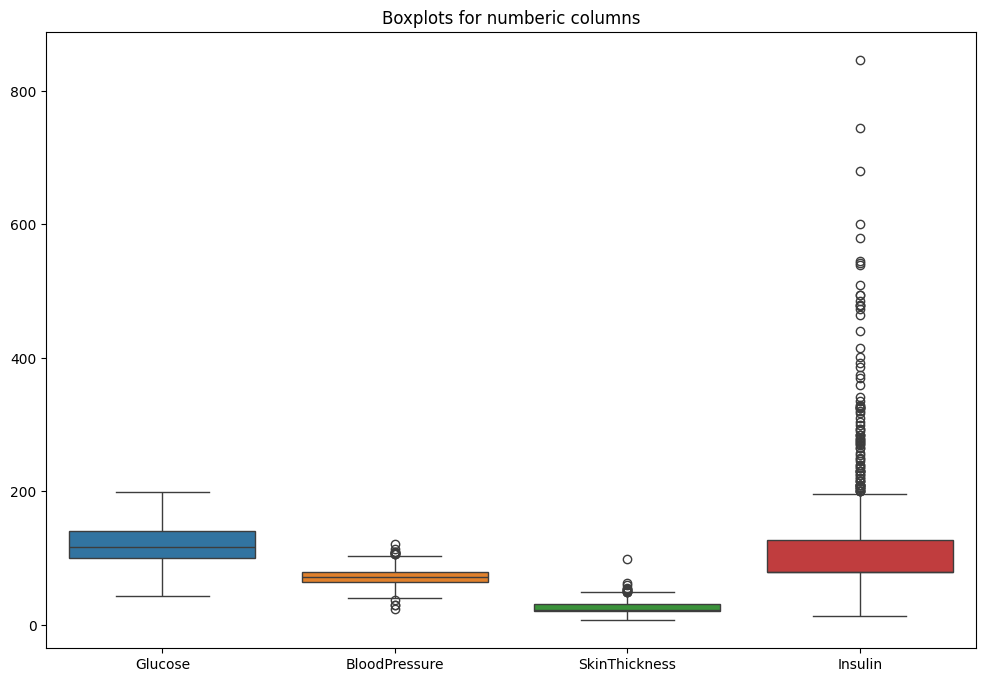

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=columns)
plt.title("Boxplots for numberic columns")
plt.show()

In [ ]:
data.describe()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
count,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000,768.000000
mean,3.845052,121.681605,72.254807,26.606479,118.660163,31.992578,0.471876,33.240885,0.348958
std,3.369578,30.436016,12.115932,9.631241,93.080358,7.884160,0.331329,11.760232,0.476951
min,0.000000,44.000000,24.000000,7.000000,14.000000,0.000000,0.078000,21.000000,0.000000
25%,1.000000,99.750000,64.000000,20.536458,79.799479,27.300000,0.243750,24.000000,0.000000
50%,3.000000,117.000000,72.000000,23.000000,79.799479,32.000000,0.372500,29.000000,0.000000
75%,6.000000,140.250000,80.000000,32.000000,127.250000,36.600000,0.626250,41.000000,1.000000
max,17.000000,199.000000,122.000000,99.000000,846.000000,67.100000,2.420000,81.000000,1.000000


**Finding the outlier count in the selected columns :**

In [ ]:
def find_outliers_iqr(data, column_name):

    Q1 = data[column_name].quantile(0.25)
    Q2 = data[column_name].quantile(0.75)

    #Calculate the interquartile range (IQR)

    IQR = Q2 - Q1

    #Define the lower & upperbound for outliers
    lower_bound = Q1 - 1.5 * IQR
    upper_bound = Q2 + 1.5 * IQR

    #find outliers
    outliers = data[(data[column_name] < lower_bound) | (data[column_name] > upper_bound)]

    #count the number of outliers
    count_outliers = len(outliers)

    return count_outliers
#Calculate & print number of outliers for each column
for column_name in selected_columns:
    outlier_count = find_outliers_iqr(data, column_name)
    print(f"Number of outliers in the '{column_name}' column: {outlier_count}")

Number of outliers in the 'Glucose' column: 0
Number of outliers in the 'BloodPressure' column: 14
Number of outliers in the 'SkinThickness' column: 12
Number of outliers in the 'Insulin' column: 89


**Outlier Treatment**

In [ ]:
sorted(data)
Q1 = data.quantile(0.20)
Q2 = data.quantile(0.80)
IQR = Q2 - Q1
print(IQR)

Pregnancies                  6.000000
Glucose                     52.000000
BloodPressure               20.000000
SkinThickness               14.463542
Insulin                     70.200521
BMI                         11.900000
DiabetesPedigreeFunction     0.467600
Age                         19.600000
Outcome                      1.000000
dtype: float64


In [ ]:
data_cleared_iqr = data[~((data < (Q1 - 1.5 * IQR)) | (data > (Q2 + 1.5*IQR))).any(axis=1)]
data_cleared_iqr
print(data_cleared_iqr.shape)
print(data.shape)

(678, 9)
(768, 9)


In [ ]:
data_cleared_iqr

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148.0,72.0,35.000000,79.799479,33.6,0.627,50,1
1,1,85.0,66.0,29.000000,79.799479,26.6,0.351,31,0
2,8,183.0,64.0,20.536458,79.799479,23.3,0.672,32,1
3,1,89.0,66.0,23.000000,94.000000,28.1,0.167,21,0
5,5,116.0,74.0,20.536458,79.799479,25.6,0.201,30,0
...,...,...,...,...,...,...,...,...,...
763,10,101.0,76.0,48.000000,180.000000,32.9,0.171,63,0
764,2,122.0,70.0,27.000000,79.799479,36.8,0.340,27,0
765,5,121.0,72.0,23.000000,112.000000,26.2,0.245,30,0
766,1,126.0,60.0,20.536458,79.799479,30.1,0.349,47,1




*   Original Dataset size : 768
*   Dataset size after outlier removal : 678



In [ ]:
col = data_cleared_iqr[['Glucose','BloodPressure','SkinThickness','Insulin']]

*Checking the outliers after treatment using boxplot*

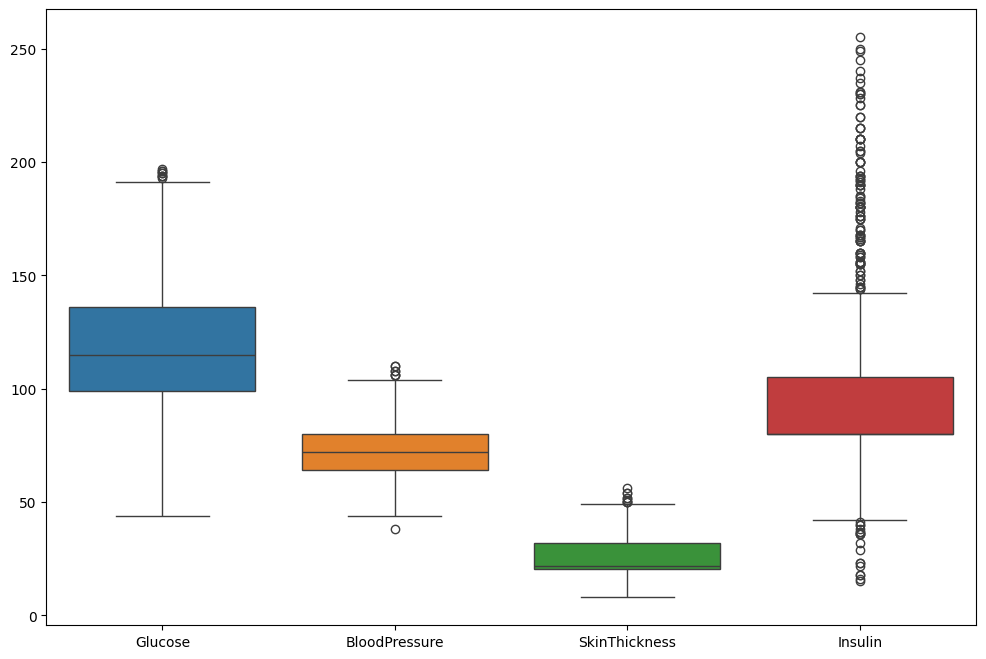

In [ ]:
plt.figure(figsize=(12,8))
sns.boxplot(data=col)
plt.show()

*It can be observed that the outliers have been significantly reduced...*

**Using Z-Scores to Detect Number of Outliers**

In [ ]:
z_scores = zscore(data.select_dtypes(include=['float', 'int']))
data_outliers = data[(z_scores > 3).any(axis=1)]
print(f"Number of Outliers: {len(data_outliers)}")

Number of Outliers: 47


**EDA - Exploratory Data Analysis** - Univariate analysis for each feature

Using histograms to explore particular variables

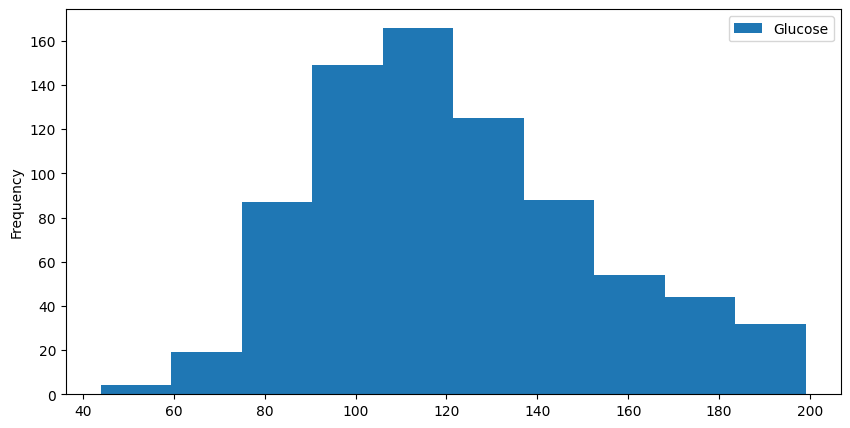

In [ ]:
data['Glucose'].plot(kind='hist', figsize = (10,5))
plt.legend()
plt.show()

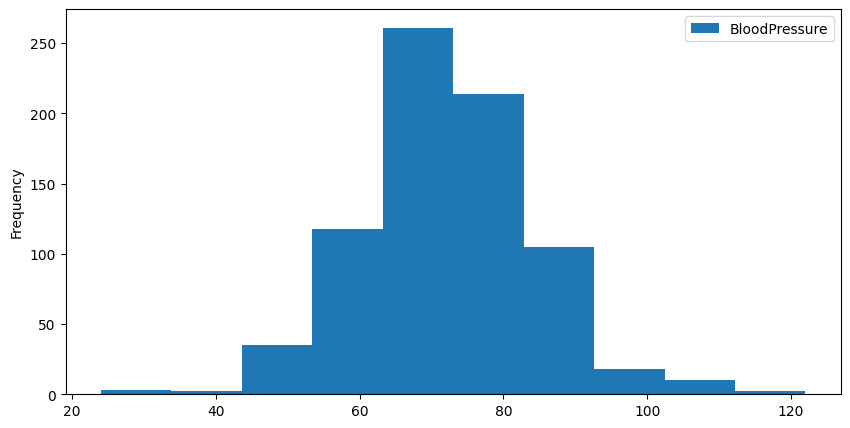

In [ ]:
data['BloodPressure'].plot(kind='hist', figsize = (10,5))
plt.legend()
plt.show()

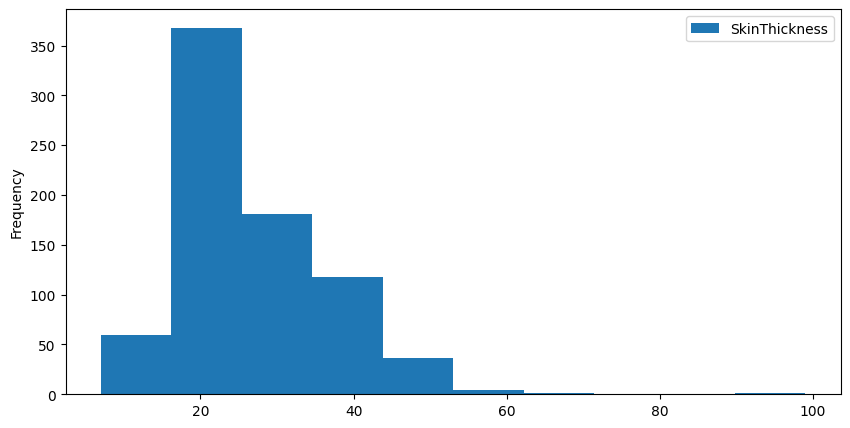

In [ ]:
data['SkinThickness'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

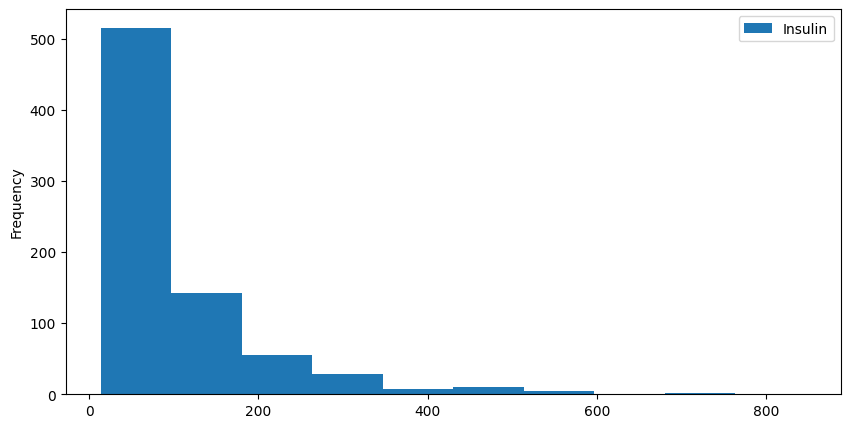

In [ ]:
data['Insulin'].plot(kind='hist', figsize=(10,5))
plt.legend()
plt.show()

Violin plot for the important feautures

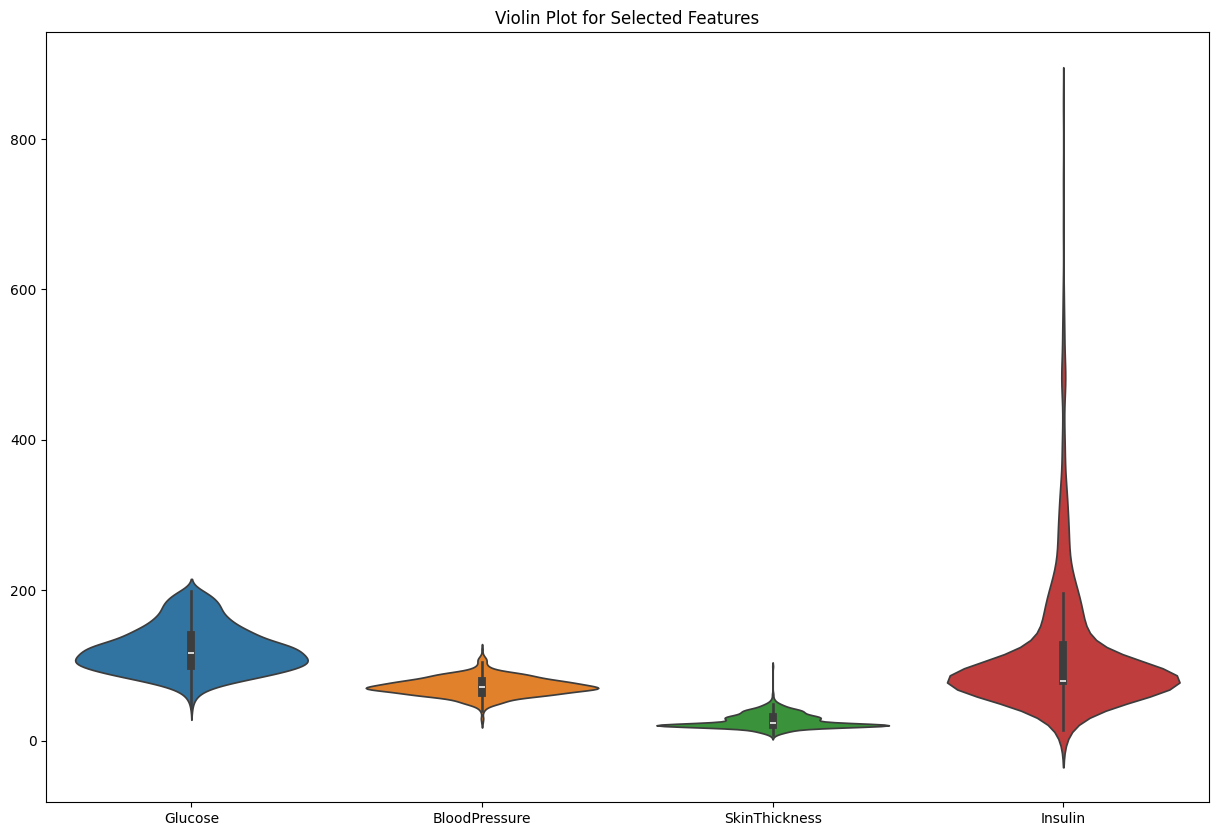

In [ ]:
plt.figure(figsize=(15,10))
sns.violinplot(data=data[selected_columns])
plt.title("Violin Plot for Selected Features")
plt.show()

**Kernel Density Estimation (KDE) Plot for Important Features**

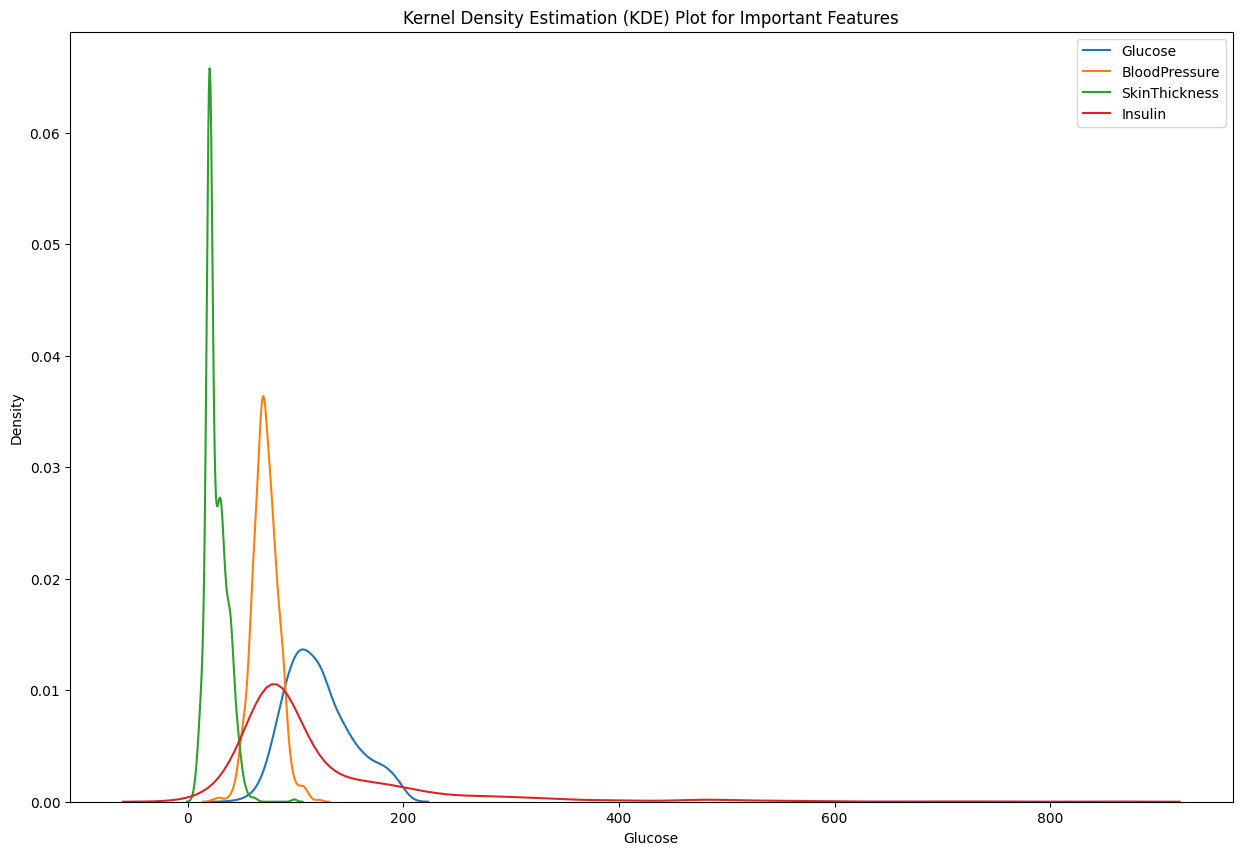

In [ ]:
plt.figure(figsize=(15,10))
for column in selected_columns:
  sns.kdeplot(data[column], label=column)
plt.title("Kernel Density Estimation (KDE) Plot for Important Features")
plt.legend()
plt.show()

**Creating a Count plot describing the data types and the count of variables**

In [ ]:
data.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


In [ ]:
data.dtypes.value_counts()

,count
float64,6
int64,3


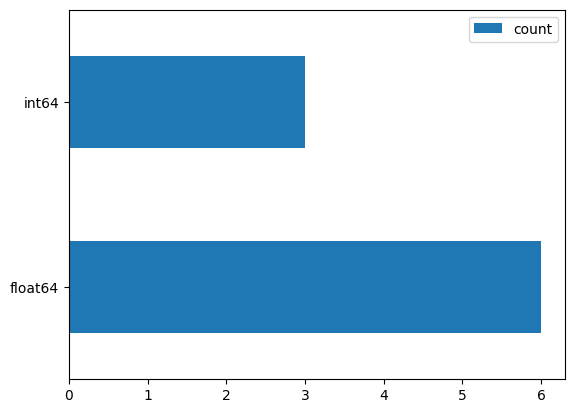

In [ ]:
figsize = (16,2)
data.dtypes.value_counts().plot(kind='barh')
plt.legend()
plt.show()

 *three features of Integer type &
Six features of Float type*

# Check Balance of the data by plotting count of outcomes by their values.

In [ ]:
data['Outcome'].value_counts()

,count
Outcome,
0,500
1,268


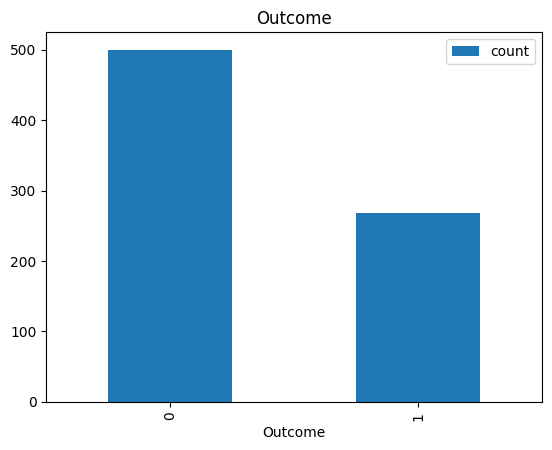

In [ ]:
data['Outcome'].value_counts().plot(kind='bar')
plt.legend()
plt.title('Outcome')
plt.show()

In [ ]:
outcome = (data['Outcome'].value_counts()/data['Outcome'].shape)*100


In [ ]:
outcome

,count
Outcome,
0,65.104167
1,34.895833


In [ ]:
balanced_data= 100 - outcome
balanced_data

,count
Outcome,
0,34.895833
1,65.104167


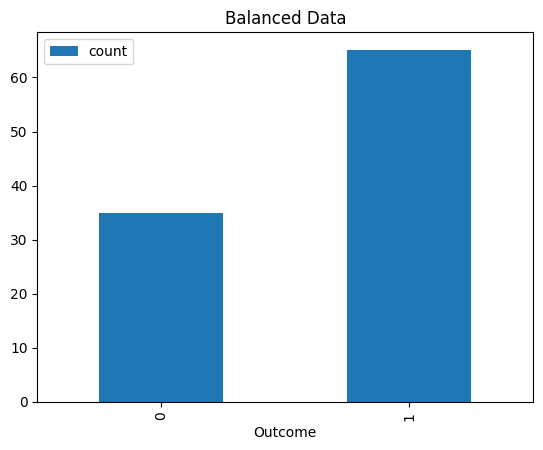

In [ ]:
balanced_data.plot(kind='bar')
plt.legend()
plt.title("Balanced Data")
plt.show()

# Findings and Planning Future Course of Action
Due to Imbalance dataset, this shows that the dataset is biased towards class 0.
If a dataset is biased towards one class, the algorithm will be biased too... thats why we need to balance it.



**Bi-Variate Analysis**

Creating scatter charts between each pair of variables..

In [ ]:
data.dtypes

,0
Pregnancies,int64
Glucose,float64
BloodPressure,float64
SkinThickness,float64
Insulin,float64
BMI,float64
DiabetesPedigreeFunction,float64
Age,int64
Outcome,int64


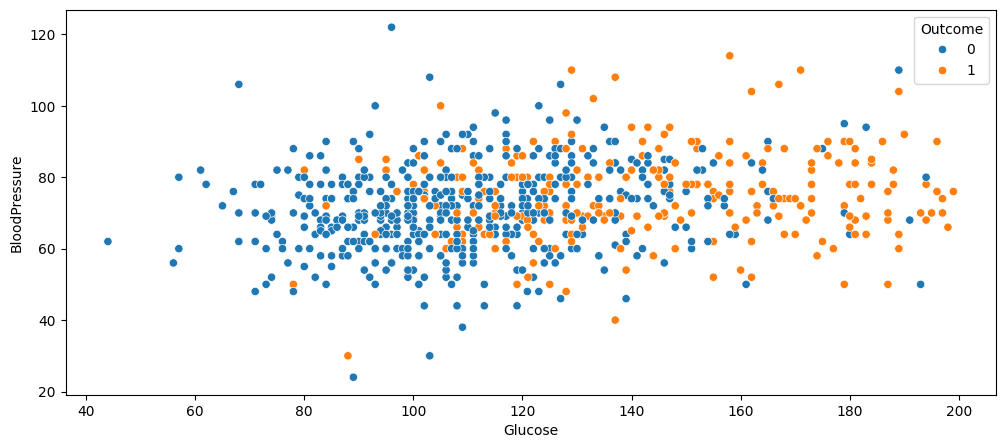

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose', y='BloodPressure', hue='Outcome', data=data)
plt.show()

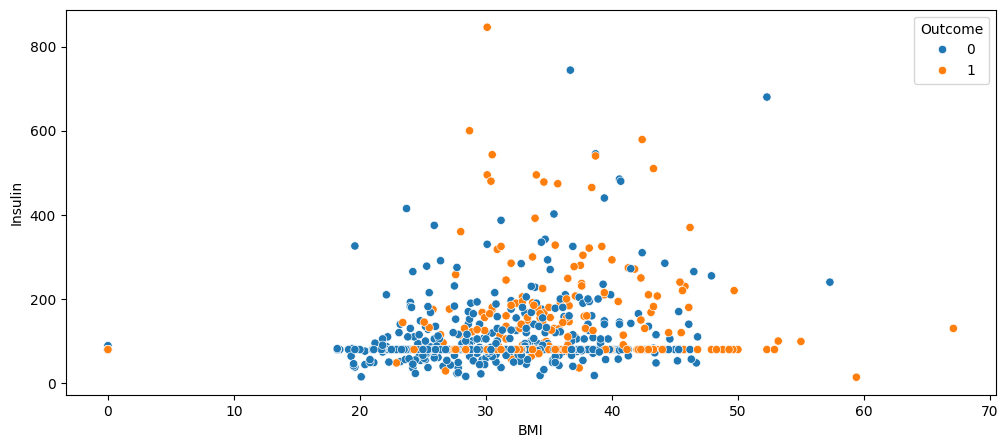

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='BMI', y='Insulin', hue='Outcome', data=data)
plt.show()

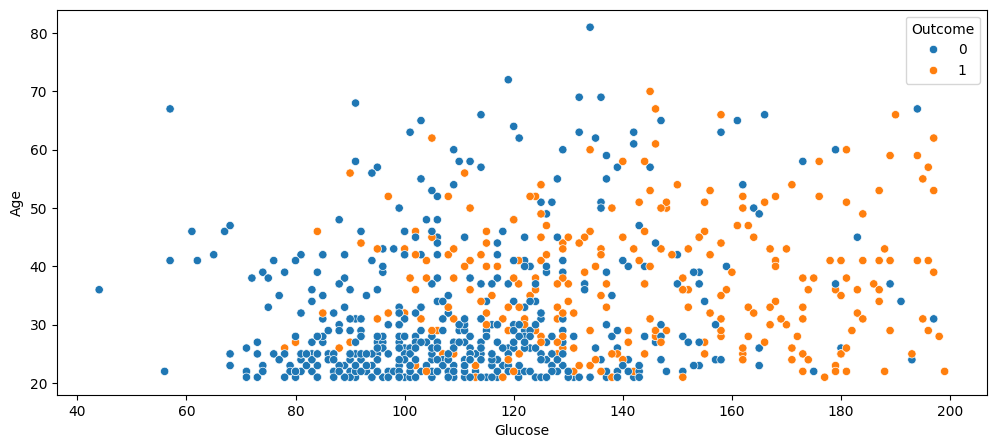

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Glucose', y='Age', hue='Outcome', data=data)
plt.show()

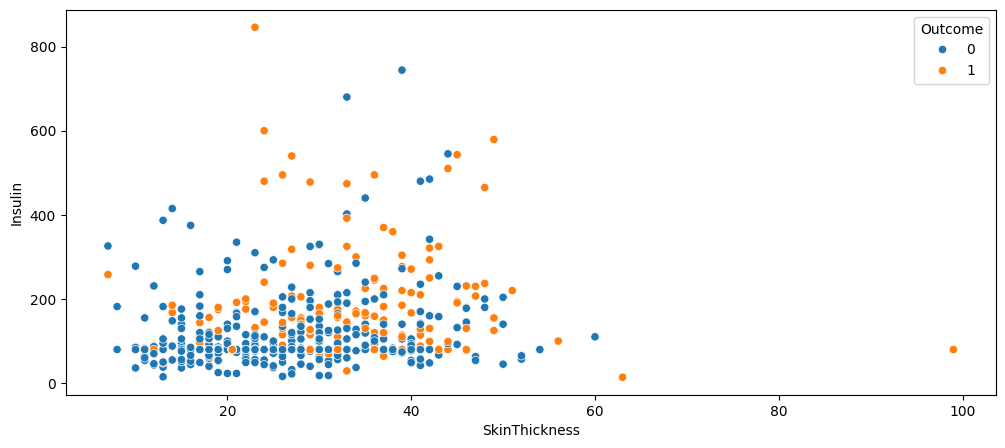

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='SkinThickness', y='Insulin', hue='Outcome', data=data)
plt.show()

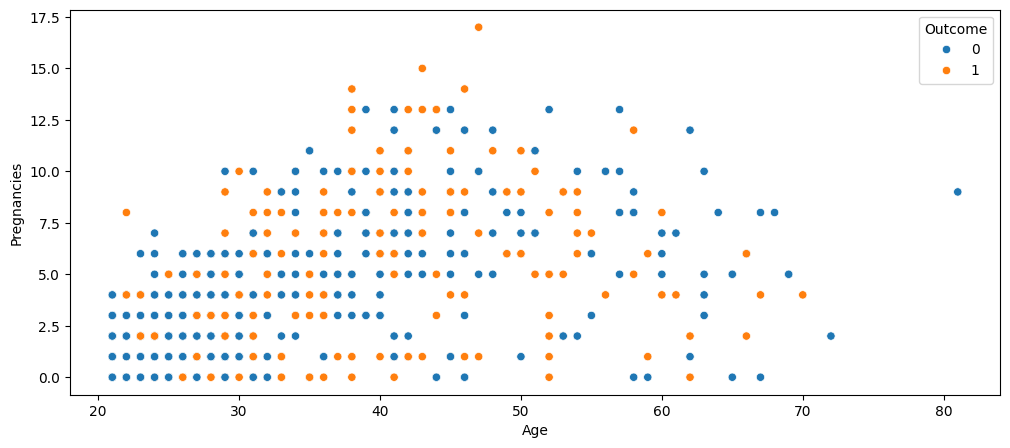

In [ ]:
plt.figure(figsize=(12,5))
sns.scatterplot(x='Age', y='Pregnancies', hue='Outcome', data=data)
plt.show()

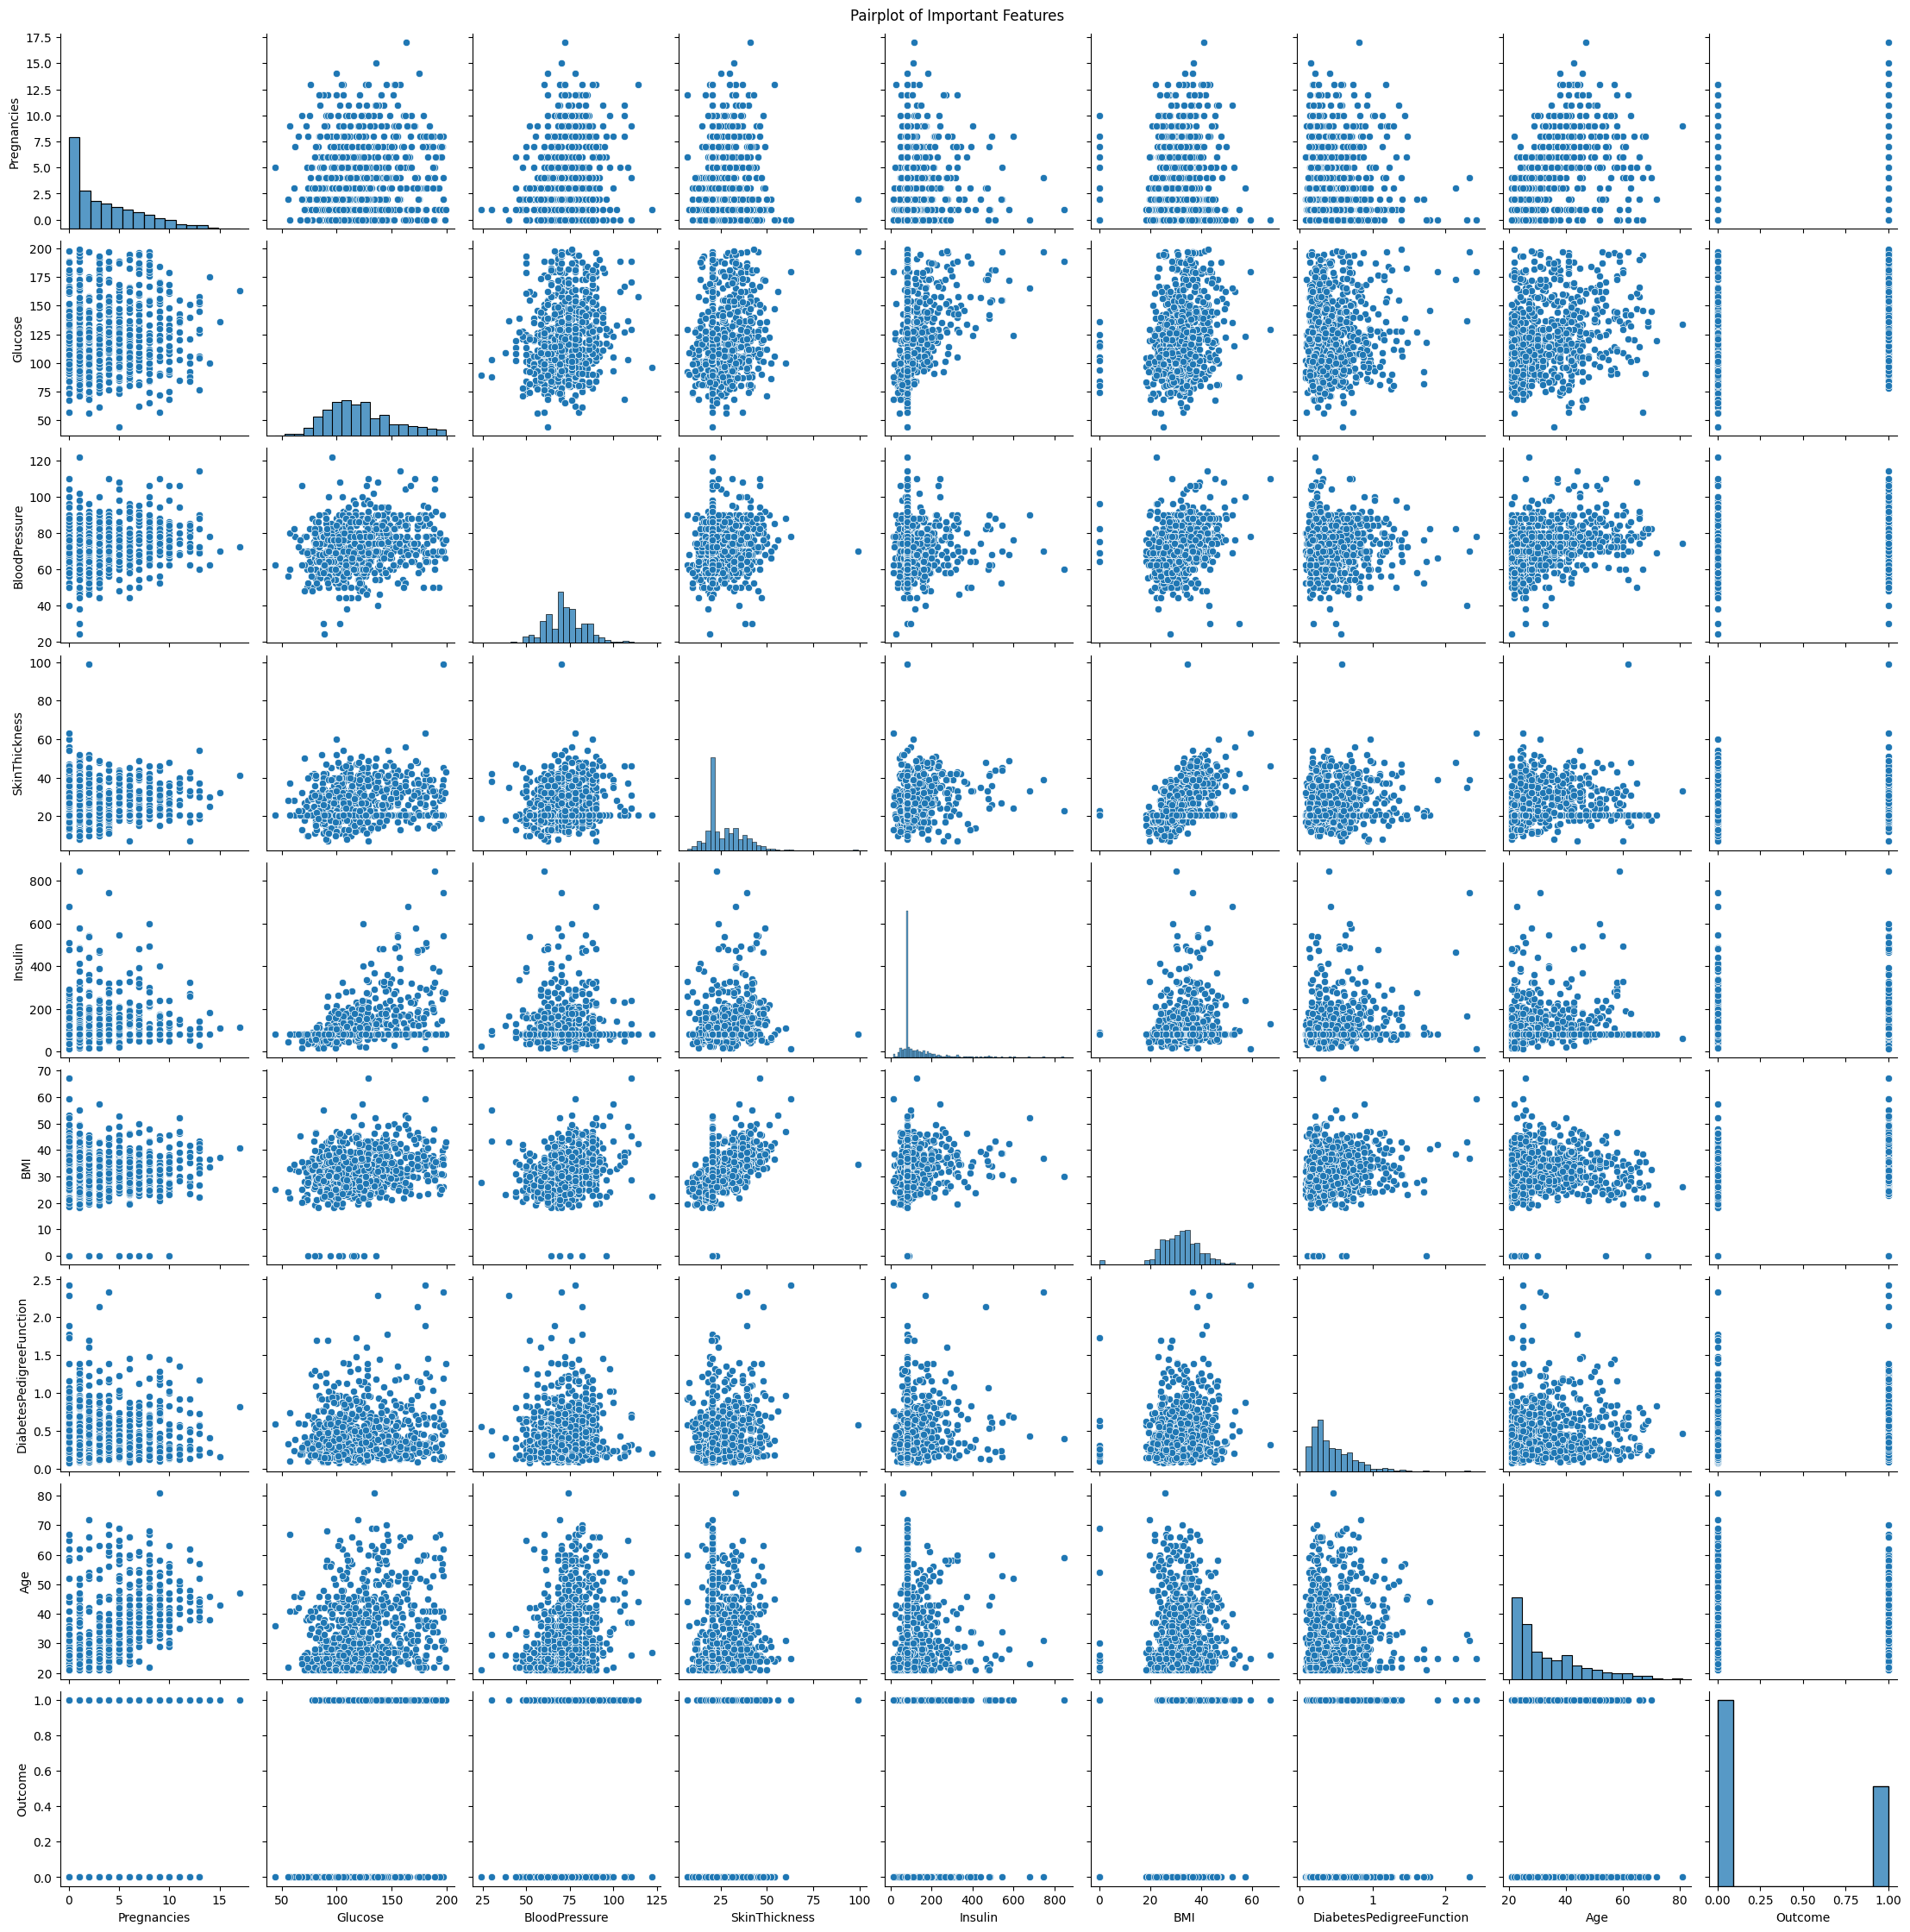

In [ ]:
sns.pairplot(data)
plt.suptitle("Pairplot of Important Features", y=1.0)
plt.show()

# Multi-Variate Analysis
Perform correlation analysis using heat map

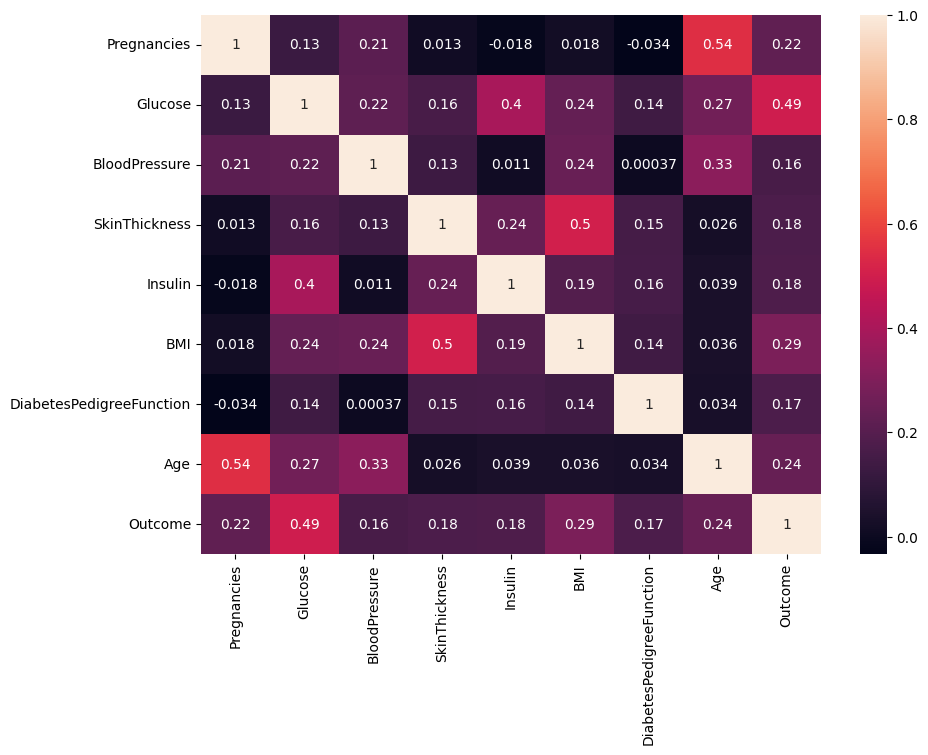

In [ ]:
plt.figure(figsize=(10,7))
sns.heatmap(data.corr(),annot=True)
plt.show()

**Using Sweetviz library to create an automated EDA by generating a visually rich and easily accessible report**

In [ ]:
!pip install sweetviz

   ━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━━ 15.1/15.1 MB 43.1 MB/s eta 0:00:00


In [ ]:
import sweetviz as sv

In [ ]:
report = sv.analyze(data)
report.show_html('sweetviz_report.html')

                                             |          | [  0%]   00:00 -> (? left)

Report sweetviz_report.html was generated! NOTEBOOK/COLAB USERS: the web browser MAY not pop up, regardless, the report IS saved in your notebook/colab files.


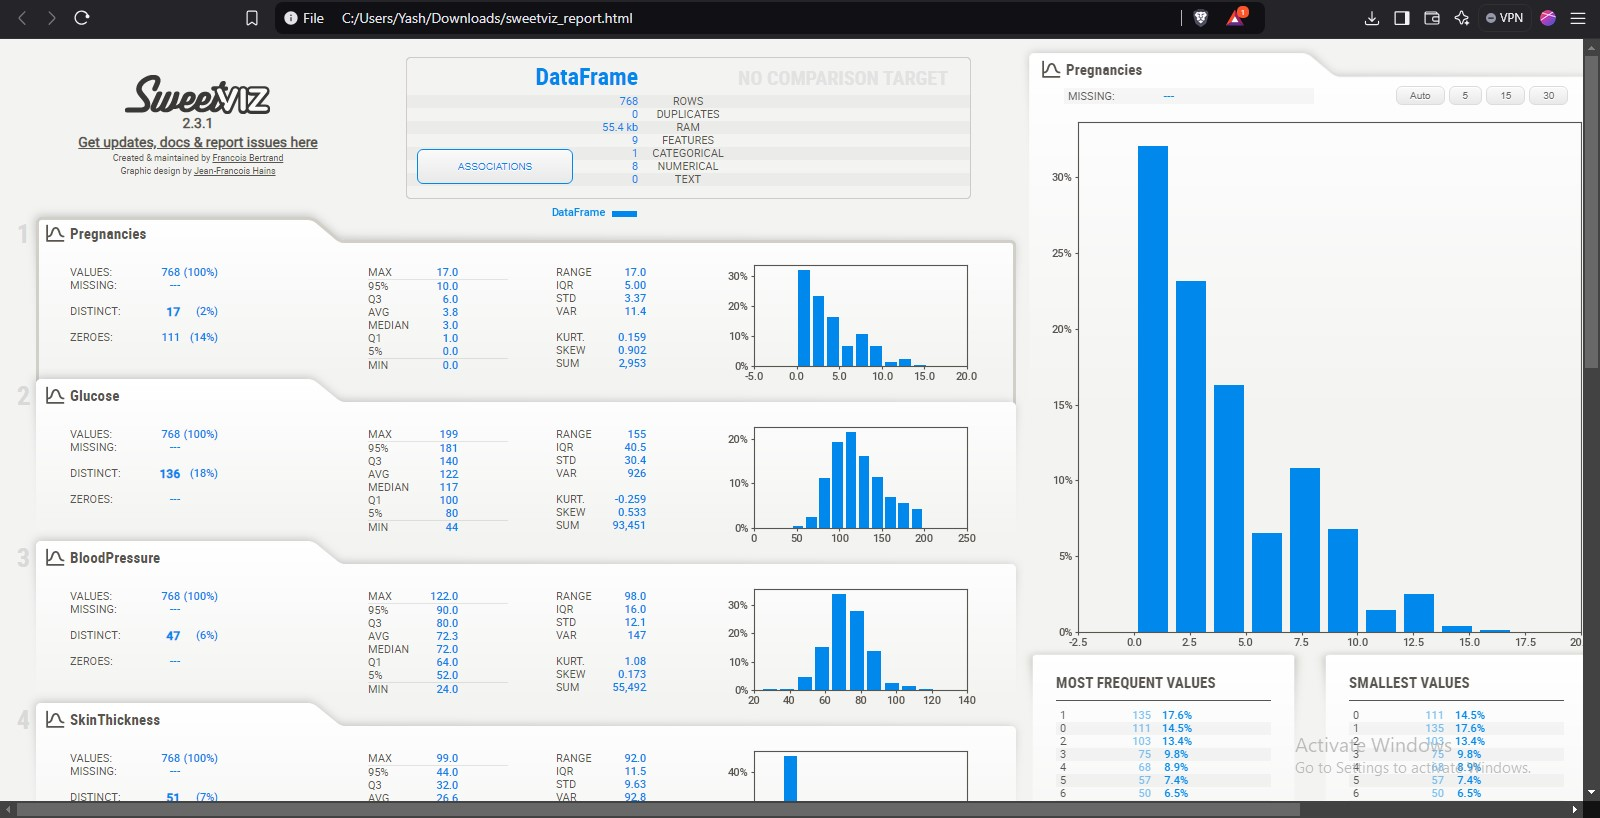

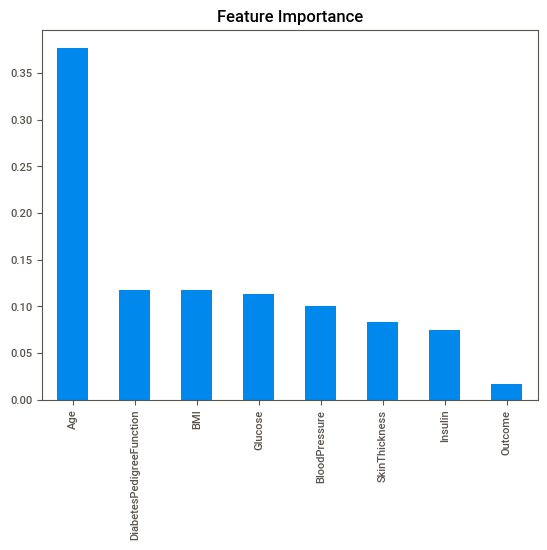

In [76]:
rf = RandomForestClassifier(random_state=42)
x = data.drop('Pregnancies', axis=1)
y = data['Age']
rf.fit(x,y)

feature_importances = pd.Series(rf.feature_importances_, index=x.columns)
feature_importances.sort_values(ascending=False).plot(kind='bar')
plt.title("Feature Importance")
plt.show()